In [37]:
import cv2
import glob
import os
import matplotlib.pyplot as plt
import shutil

In [41]:
SUNDB_POSITIVE_ROOT = "E:/SUN-SEG/sundatabase_positive"
ANNOT_ROOT = "E:/SUN-SEG/SUN-SEG-Annotation"

# Get gts
glob_result_1 = glob.glob(f"{ANNOT_ROOT}/TrainDataset/GT/*/*.png", recursive=True)
glob_result_2 = glob.glob(f"{ANNOT_ROOT}/Test*/*/GT/*/*.png", recursive=True)
glob_result = glob_result_1 + glob_result_2
assert len(glob_result) == 49136

# Get imgs
def get_name(gt_path):
    return gt_path.split("\\")[-1].split(".")[0]

def get_img(gt_path):
    name = get_name(gt_path)
    case = gt_path.split("\\")[-2].split("_")[0]
    return f"{SUNDB_POSITIVE_ROOT}/{case}/{name}.jpg"

# Combine to db
db = []
for gt_path in glob_result:
    name = get_name(gt_path)
    img_path = get_img(gt_path)
    db.append((name, img_path, gt_path))
    
assert len(db) == 49136

# Sample frames

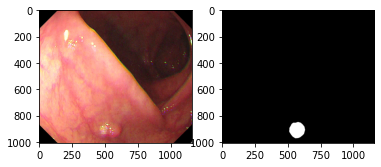

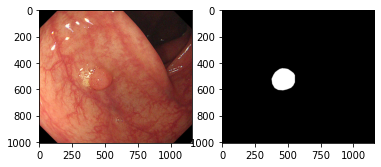

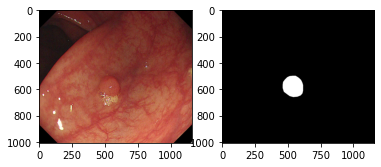

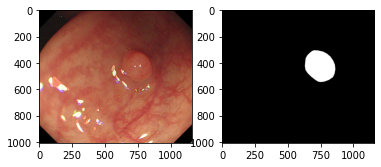

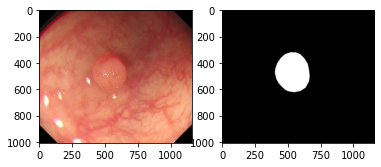

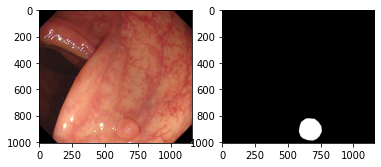

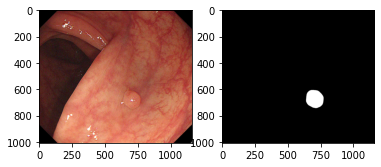

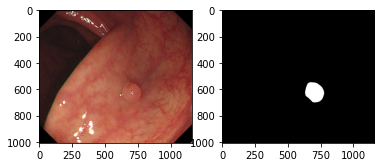

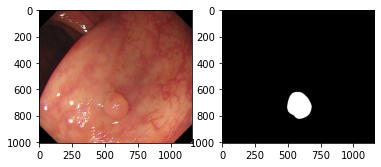

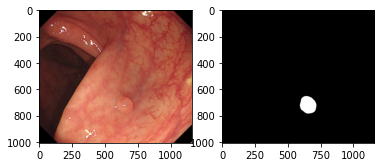

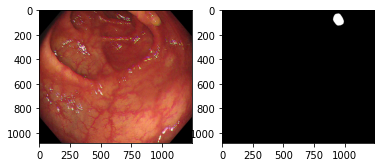

In [42]:
skip_frames = 50

frame = 0
i = 0
n_samples = 10

while True:
    _, img_path, gt_path = db[frame]

    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gt = cv2.imread(gt_path, cv2.IMREAD_COLOR)

    plt.subplot(1,2,1), plt.imshow(img)
    plt.subplot(1,2,2), plt.imshow(gt)
    plt.show()

    frame += skip_frames
    i += 1

    if i > n_samples:
        break

# Save frames

In [47]:
SAVE_ROOT = "./dataset/SunDataset"
save_img_dir = os.path.join(SAVE_ROOT, "images")
save_gt_dir = os.path.join(SAVE_ROOT, "masks")

shutil.rmtree(SAVE_ROOT, ignore_errors=True)
os.makedirs(save_img_dir, exist_ok=True)
os.makedirs(save_gt_dir, exist_ok=True)

In [48]:
skip_frames = 50

frame = 0
n_samples = 10

sizes = set()

while True:
    name, img_path, gt_path = db[frame]

    # Read img, gt
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    gt = cv2.imread(gt_path, cv2.IMREAD_COLOR)

    # Resize 1/2
    img = cv2.resize(img, dsize=None, fx=0.5, fy=0.5)
    gt = cv2.resize(gt, dsize=None, fx=0.5, fy=0.5)

    # Write img, gt
    filename = name + ".png"
    cv2.imwrite(os.path.join(save_img_dir, filename), img)
    cv2.imwrite(os.path.join(save_gt_dir, filename), gt)

    # Check sizes
    size = gt.shape
    if size not in sizes:
        sizes.add(size)
        print("New size:", size)

    # Skip frames
    frame += skip_frames
    if frame >= 49136:
        break

    if frame % 500 == 0:
        print("Process frame", frame)

New size: (504, 579, 3)
Process frame 500
New size: (540, 620, 3)
Process frame 1000
Process frame 1500
Process frame 2000
Process frame 2500
Process frame 3000
Process frame 3500
Process frame 4000
Process frame 4500
Process frame 5000
Process frame 5500
Process frame 6000
Process frame 6500
Process frame 7000
Process frame 7500
Process frame 8000
Process frame 8500
Process frame 9000
Process frame 9500
Process frame 10000
Process frame 10500
Process frame 11000
Process frame 11500
Process frame 12000
Process frame 12500
Process frame 13000
Process frame 13500
Process frame 14000
Process frame 14500
Process frame 15000
Process frame 15500
Process frame 16000
Process frame 16500
Process frame 17000
Process frame 17500
Process frame 18000
Process frame 18500
Process frame 19000
Process frame 19500
Process frame 20000
Process frame 20500
Process frame 21000
Process frame 21500
Process frame 22000
Process frame 22500
Process frame 23000
Process frame 23500
Process frame 24000
Process fram

New size: (1008, 1158, 3)
Process frame 500
New size: (1080, 1240, 3)